In [95]:
import pandas as pd 
import plotly.graph_objects as go

prix_energie = pd.read_csv("Option_Base.csv",sep=";")
prix_energie = prix_energie.dropna()
ca_no_clear = pd.read_csv("conso_annuelle.csv",sep=";")
pn = pd.read_csv("prod_national.csv",sep=";")
C_a_v =pd.read_csv("conso-elec-gaz.csv",sep=";",dtype={'column_name': str})
C_a_v = C_a_v.dropna()
#ca = pd.read_csv("conso_annuelle.csv")
print("donnée load")
ca = ca_no_clear.dropna()
C_a_v = C_a_v[C_a_v['consoa'] != 0]
C_a_v = C_a_v[C_a_v['consoa'] >= 100]

C:\Users\PROPRIETAIRE\AppData\Local\Temp\ipykernel_14116\1224188565.py:8: DtypeWarning:

Columns (25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.



donnée load


In [96]:
ca.head()

,Appareil suivi,ID logement,Consommation annuelle AN1,Consommation annuelle AN2,Type
1,Audio_TV,302,"22,2","16,7",Barre De Son
2,Audio_TV,311,"14,7",13,Barre De Son
3,Audio_TV,410,"7,8","7,8",Barre De Son
4,Audio_TV,608,"7,9","7,5",Barre De Son
6,Audio_TV,302,"6,4","6,9",Barre De Son 2


In [97]:
C_a_v.head()

,operateur,annee,filiere,consoa,pdla,nombre_maille_secretisees_a,indquala,consoi,pdli,nombre_maille_secretisees_i,...,libelle_commune,code_epci,libelle_epci,code_departement,libelle_departement,code_region,libelle_region,id_filiere,consototale,code_postal
13,GRDF,2021,Gaz,147.59129,3,0,0.000,0.00000,0,0,...,Coulanges-la-Vineuse,200067114,CA de l'Auxerrois,89,Yonne,27,Bourgogne-Franche-Comté,200,5812.73280,89580
32,GRDF,2021,Gaz,2050.55413,3,1,1.000,0.00000,0,1,...,Mont-Saint-Sulpice,200067304,CC Serein et Armance,89,Yonne,27,Bourgogne-Franche-Comté,200,5684.91460,89250
41,GRDF,2021,Gaz,191.94770,6,0,0.000,117.86346,1,0,...,Saint-Bris-le-Vineux,200067114,CA de l'Auxerrois,89,Yonne,27,Bourgogne-Franche-Comté,200,4461.11157,89530
46,GRDF,2021,Gaz,329.05087,6,2,0.108,53006.96402,120,1,...,Sens,248900334,CA du Grand Sénonais,89,Yonne,27,Bourgogne-Franche-Comté,200,199550.00944,89100
52,GRDF,2021,Gaz,181.96627,1,0,0.000,0.00000,0,0,...,Villeblevin,248900896,CC Yonne Nord,89,Yonne,27,Bourgogne-Franche-Comté,200,6693.80035,89340


In [98]:
pn.head()


,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies,consommation_totale
0,2016,530.6,45.0,2.5,7.2,35.3,63.6,384.0,20.9,8.4,8.6,482.402093
1,2019,536.1,41.7,1.9,1.5,38.3,59.6,379.5,33.8,12.0,9.5,472.033672
2,2020,499.8,37.4,1.6,1.3,34.4,65.0,335.4,39.7,12.7,9.6,448.554017
3,2013,550.0,43.6,3.8,19.9,19.9,75.5,404.0,15.9,4.7,7.1,495.000000
4,2017,528.3,53.5,2.9,9.7,40.9,53.2,379.1,24.0,9.1,9.3,481.081733


In [99]:
###consommation 

In [100]:
ca.columns

Index(['Appareil suivi', 'ID logement', 'Consommation annuelle  AN1',
       'Consommation annuelle AN2', 'Type'],
      dtype='object')

In [101]:
ca['Appareil suivi']

1          Audio_TV
2          Audio_TV
3          Audio_TV
4          Audio_TV
6          Audio_TV
           ...     
2198    Téléviseurs
2200    Téléviseurs
2202    Téléviseurs
2203    Téléviseurs
2204    Téléviseurs
Name: Appareil suivi, Length: 555, dtype: object

In [102]:
ca['Appareil suivi'].unique()

array(['Audio_TV', 'Chaudières', 'Clim_mob_rafraich_Déshum',
       'Congélateur', 'Cuisinières', 'Divers cuisine',
       'Eau chaude sanitaire', 'Hifi', 'Imprimantes', 'Lave linge',
       'Loisirs', 'Mobilité_électrique', 'Nettoyage_sols',
       'Périph_info_bureautique', 'Périph_Internet_réseaux',
       'Periph_multimedia', 'Piscines', 'Plaques cuisson', 'Poêles',
       'Pompes', 'Repassage', 'Santé', 'Sèche linge', 'Sécurité',
       'Tablettes_smartph', 'Téléviseurs'], dtype=object)

In [103]:
audio_tv_consumption = ca[ca['Appareil suivi'] == 'Audio_TV']

# Extraire la consommation annuelle des appareils de la catégorie "Audio_TV"
audio_tv_consumption_annuelle = audio_tv_consumption['Consommation annuelle  AN1']

# Afficher la consommation annuelle
print(audio_tv_consumption_annuelle)



1     22,2
2     14,7
3      7,8
4      7,9
6      6,4
7       10
8      0,5
9     18,7
10     6,6
11     1,1
12    59,3
Name: Consommation annuelle  AN1, dtype: object


In [104]:
import pandas as pd

# Suppose que ca est votre DataFrame contenant les données
categories_specifiees = ca['Appareil suivi'].unique()
dat=[]
for categorie in categories_specifiees:
    # Sélectionner les données pour la catégorie spécifiée
    consommation_categorie = ca[ca['Appareil suivi'] == categorie]['Consommation annuelle  AN1']
    
    # Nettoyer les valeurs en supprimant les virgules et convertir en float
    consommation_categorie = consommation_categorie.str.replace(',', '').astype(float)
    
    # Calculer la moyenne pour cette catégorie
    moyenne_categorie = consommation_categorie.mean()
    dat.append(moyenne_categorie)
    print(f"Moyenne pour la catégorie {categorie}: {moyenne_categorie}")

print(sum(dat))


Moyenne pour la catégorie Audio_TV: 132.9090909090909
Moyenne pour la catégorie Chaudières: 2294.3214285714284
Moyenne pour la catégorie Clim_mob_rafraich_Déshum: 2893.8
Moyenne pour la catégorie Congélateur: 2540.931818181818
Moyenne pour la catégorie Cuisinières: 1605.4285714285713
Moyenne pour la catégorie Divers cuisine: 112.16666666666667
Moyenne pour la catégorie Eau chaude sanitaire: 13370.395833333334
Moyenne pour la catégorie Hifi: 265.44117647058823
Moyenne pour la catégorie Imprimantes: 74.64102564102564
Moyenne pour la catégorie Lave linge: 843.925925925926
Moyenne pour la catégorie Loisirs: 2301.5714285714284
Moyenne pour la catégorie Mobilité_électrique: 108.2
Moyenne pour la catégorie Nettoyage_sols: 110.5
Moyenne pour la catégorie Périph_info_bureautique: 12.0
Moyenne pour la catégorie Périph_Internet_réseaux: 811.3333333333334
Moyenne pour la catégorie Periph_multimedia: 439.09090909090907
Moyenne pour la catégorie Piscines: 16411.14285714286
Moyenne pour la catégorie 

In [105]:
unique_filiere = C_a_v['libelle_epci'].unique()
print(unique_filiere)

["CA de l'Auxerrois" 'CC Serein et Armance' 'CA du Grand Sénonais' ...
 'CC des Vosges du Sud' 'CC de Marie-Galante'
 'CC de la Vallée de Saint-Amarin']


In [106]:
C_a_v.columns

Index(['operateur', 'annee', 'filiere', 'consoa', 'pdla',
       'nombre_maille_secretisees_a', 'indquala', 'consoi', 'pdli',
       'nombre_maille_secretisees_i', 'indquali', 'consot', 'pdlt',
       'nombre_maille_secretisees_t', 'indqualt', 'consor', 'pdlr',
       'nombre_maille_secretisees_r', 'indqualr', 'thermor', 'partr',
       'consona', 'pdlna', 'nombre_maille_secretisees_na', 'indqualna',
       'code_commune', 'libelle_commune', 'code_epci', 'libelle_epci',
       'code_departement', 'libelle_departement', 'code_region',
       'libelle_region', 'id_filiere', 'consototale', 'code_postal'],
      dtype='object')

In [107]:
recent_data = C_a_v[C_a_v['annee'] >= (C_a_v['annee'].max() - 9)]

average_consumption_per_city = recent_data.groupby('libelle_commune')['consoa'].mean().reset_index()

print(average_consumption_per_city)

            libelle_commune       consoa
0                      Aast   117.860759
1                Abainville   248.640180
2      Abaucourt-Hautecourt   205.024450
3            Abbans-Dessous   151.006772
4                  Abbaretz  1152.354077
...                     ...          ...
15801           Île-d'Houat   133.671384
15802           Île-de-Batz   164.313921
15803            Ô-de-Selle   291.825531
15804        Œuf-en-Ternois   230.609951
15805                Œuilly   213.474221

[15806 rows x 2 columns]


In [108]:
def show_conso(ville):
    abainville_data = C_a_v[(C_a_v['libelle_commune'] == ville) & 
                             (C_a_v['annee'] >= (C_a_v['annee'].max() - 9)) &
                             (C_a_v['filiere'] == 'Electricité')]
    
    abainville_data_sorted = abainville_data.sort_values(by='annee')
    
    
    print(abainville_data_sorted[['annee', 'consoa']])
    
    fig = go.Figure(data=go.Bar(x=abainville_data_sorted['annee'], y=abainville_data_sorted['consoa']))
    
    # Update the layout
    fig.update_layout(title=f'Evolution of Consumption in {ville} Over the Last 10 Years',
                      xaxis_title='Year',
                      yaxis_title='Consumption')
    
    # Show the plot
    fig.show()

In [109]:
communes = C_a_v['libelle_commune'].unique()
# Print the list of communes
for commune in communes:
    print(commune)

Coulanges-la-Vineuse
Mont-Saint-Sulpice
Saint-Bris-le-Vineux
Sens
Villeblevin
Brunoy
Cheptainville
Verrières-le-Buisson
Clamart
Colombes
Levallois-Perret
Meudon
Saint-Denis
Arnouville
Goussainville
Louvres
Landrais
Labarde
Margaux-Cantenac
Parempuyre
Pessac
Sainte-Eulalie
Saint-Jean-d'Illac
Saint-Julien-Beychevelle
Dingsheim
Illkirch-Graffenstaden
Sand
Strasbourg
Stutzheim-Offenheim
Wahlenheim
Cissé
Montamisé
Annay
Chevenon
Cosne-Cours-sur-Loire
Decize
Entrains-sur-Nohain
Luthenay-Uxeloup
Mars-sur-Allier
Menestreau
Murlin
Rix
Sermoise-sur-Loire
Tracy-sur-Loire
Varennes-lès-Narcy
Aix-en-Pévèle
Annœullin
Armbouts-Cappel
Auchy-lez-Orchies
Baisieux
Bantouzelle
Bauvin
Bersée
Béthencourt
Bourghelles
Caëstre
Camphin-en-Carembault
Cantaing-sur-Escaut
Chemy
Douai
Le Doulieu
Dunkerque
Ennevelin
Erchin
Estaires
Flêtre
Ghyvelde
Gravelines
La Groise
Hamel
Hardifort
Hem-Lenglet
Hondschoote
Houplin-Ancoisne
Lezennes
Lompret
Morbecque
Mouchin
Nomain
Noordpeene
Phalempin
Pitgam
Potelle
Prémesques
Prisc

        annee      consoa
498990   2012  160.900000
453202   2013  165.650000
127491   2014  155.400000
426198   2015  151.370000
101013   2016  158.230000
400600   2017  163.220000
368957   2018  330.813916
337923   2019  378.024525
186833   2020  389.717951
329111   2021  433.075404


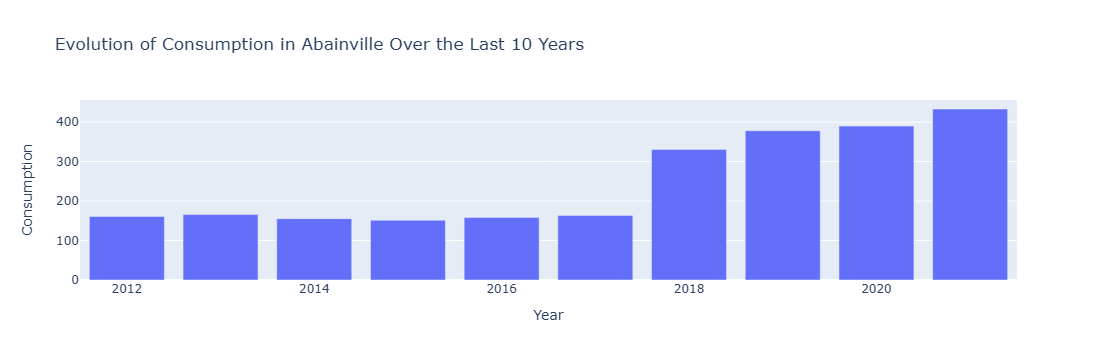

In [110]:
show_conso("Abainville")

        annee        consoa
303295   2012  12149.120000
291452   2013  11155.940000
279702   2014  10261.510000
254468   2015  10019.060000
393352   2016  10902.150000
88334    2017  11659.870000
47018    2018  13184.970110
5968     2019  16496.174647
31520    2020  17654.023994
50302    2021  17336.091078


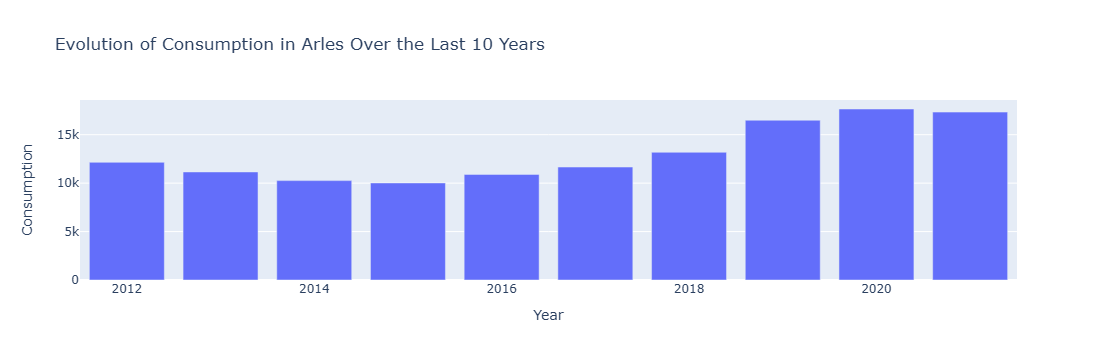

In [111]:
show_conso("Arles")

        annee  consoa
153276   2012  153.21
295181   2013  174.62
134508   2015  138.29
430424   2016  154.90
399372   2017  467.19


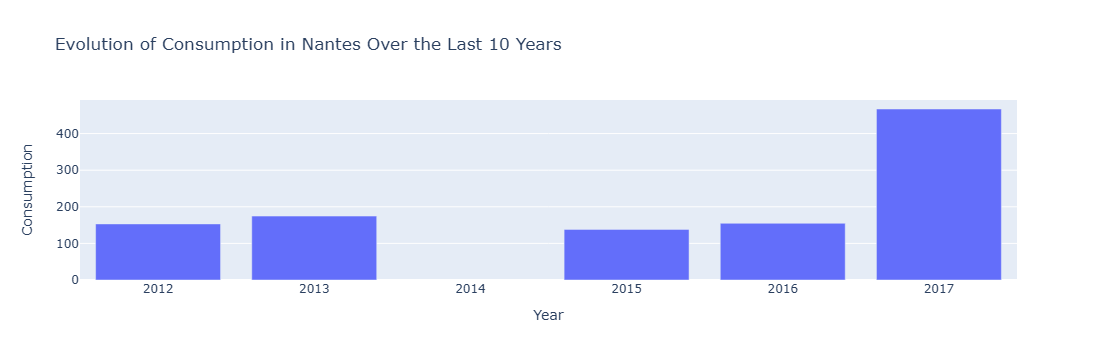

In [112]:
show_conso("Nantes")

        annee       consoa
153672   2012   112.800000
158416   2013   162.460000
283922   2014   153.370000
134927   2015   186.440000
254166   2016   240.410000
399769   2017   226.650000
215001   2018  1241.244192
180437   2019  1436.289844
355982   2020  1364.368953
51162    2021  1284.306333


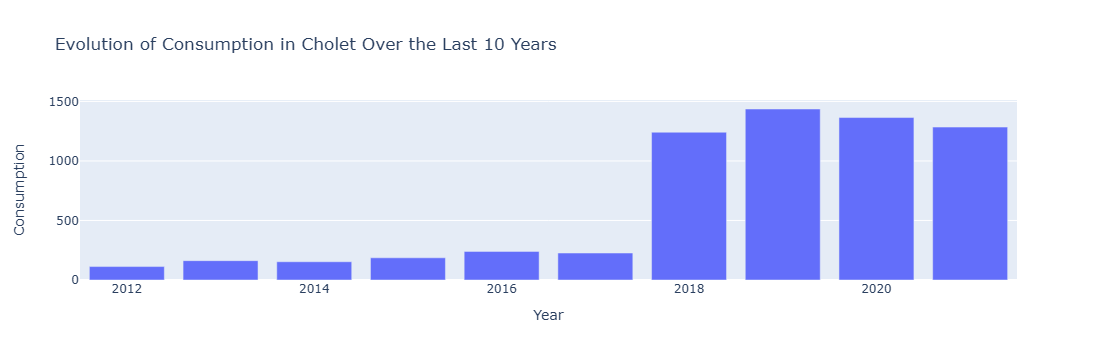

In [113]:
show_conso("Cholet")

        annee      consoa
416465   2012  249.680000
294436   2013  246.230000
456051   2014  221.470000
424261   2015  196.570000
173715   2021  102.450155


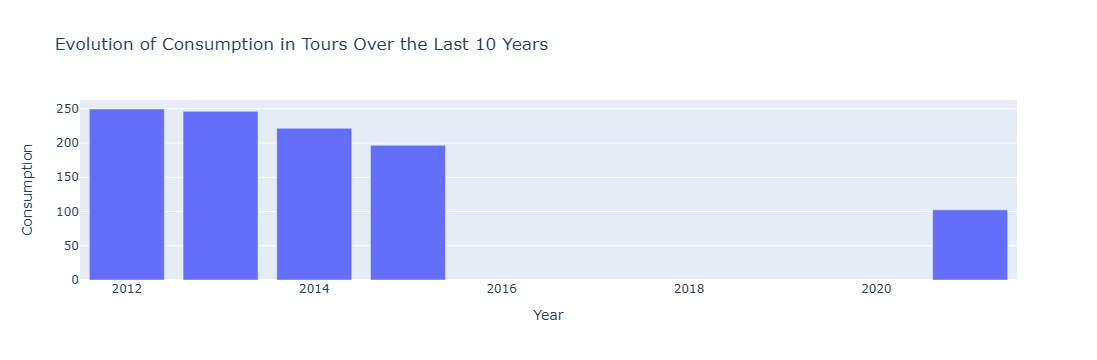

In [114]:
show_conso("Tours")

In [115]:
C_a_v['consoa']

13         147.59129
32        2050.55413
41         191.94770
46         329.05087
52         181.96627
             ...    
501533     179.62000
501537     115.56000
501539     191.54000
501549     969.47000
501563     256.28000
Name: consoa, Length: 104001, dtype: float64

In [116]:
prompt = C_a_v['consoa']
for promp in prompt:
    print(promp)

147.59129
2050.55413
191.9477
329.05087
181.96627
205.71851
600.89592
122.67385
575.87789
100.7008
378.73999
554.65973
551.37287
173.7123
114.89691
144.41864
1757.626416
691.0
2860.0
602.0
931.0
306.0
1047.0
3252.0
118.0
522.0
365.0
1608.0
422.0
297.0
1236.0
301.0
138.85
343.68
17323.84
169.19
229.44
174.35
213.77
153.69
507.19
213.72
268.98
130.79
576.7
1442.74
164.03
132.27
371.31
133.86
119.1
128.51
361.83
191.19
594.96
218.74
569.62
345.9
334.59
382.15
134.34
137.11
923.15
217.45
112.82
2021.04
110.37
19734.5
115.34
132.14
216.89
356.62
2441.6
127.09
145.38
108.22
285.77
421.15
455.59
143.88
124.45
359.94
139.46
633.8
456.6
118.13
271.11
109.85
587.89
234.82
214.4
665.57
234.78
6726.46
546.35
108.96
221.79
444.41
1300.82
410.99
152.5
551.7
101.31
537.75
251.25
433.7
176.26
310.05
119.34
1862.33
139.49
107.39
391.87
290.86
246.43
149.51
272.56
174.69
227.19
122.83
245.63
126.9
404.25
430.21
378.86
101.8
580.85
123.55
112.67
185.12
867.58
286.6
196.38
1645.91
611.35
177.84
104.77
165

In [117]:
def show_region_conso(region):
    # Filter data for the specified region, the last 10 years, and electricity consumption
    region_data = C_a_v[(C_a_v['libelle_region'] == region) & 
                        (C_a_v['annee'] >= (C_a_v['annee'].max() - 9)) & 
                        (C_a_v["filiere"] == "Electricité")]
    
    # Sort the data by year
    region_data_sorted = region_data.sort_values(by='annee')
    
    # Group data by year and calculate the sum of electricity consumption for each year
    yearly_consumption_sum = region_data_sorted.groupby('annee')['consoa'].sum()
    
    # Print the sum of consumption for each year
    print("Sum of Consumption for each Year in", region)
    print(yearly_consumption_sum)
    
    # Create a bar plot
    fig = go.Figure(data=go.Bar(x=yearly_consumption_sum.index, y=yearly_consumption_sum.values))
    
    # Update the layout
    fig.update_layout(title=f'Sum of Electricity Consumption for each Year in {region} Over the Last 10 Years',
                      xaxis_title='Year',
                      yaxis_title='Total Electricity Consumption (kWh)')
    
    # Show the plot
    fig.show()

Sum of Consumption for each Year in Nouvelle-Aquitaine
annee
2012    4.608829e+05
2013    4.219573e+05
2014    3.930196e+05
2015    4.606289e+05
2016    5.299158e+05
2017    5.400586e+05
2018    9.427902e+05
2019    9.472640e+05
2020    1.046102e+06
2021    9.564497e+05
Name: consoa, dtype: float64


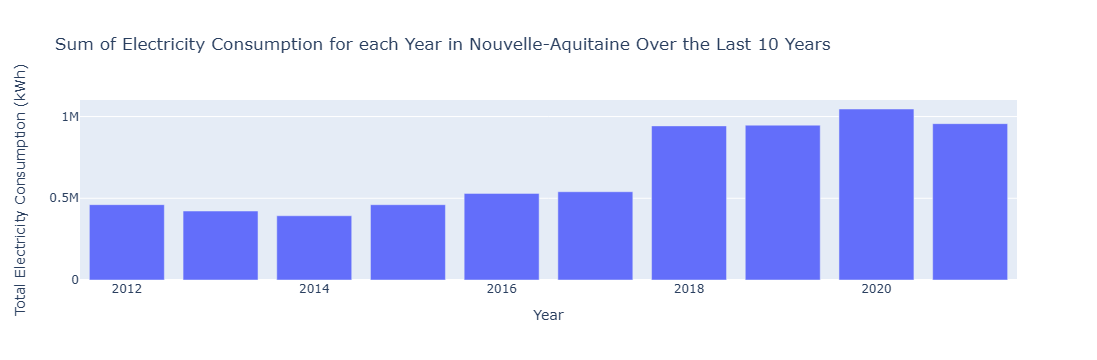

In [118]:
show_region_conso('Nouvelle-Aquitaine')

Sum of Consumption for each Year in Grand Est
annee
2012    114877.750000
2013    118116.580000
2014    122662.840000
2015    154660.520000
2016    156921.140000
2017    187884.860000
2018    436159.177184
2019    379859.931868
2020    398756.023353
2021    387733.203181
Name: consoa, dtype: float64


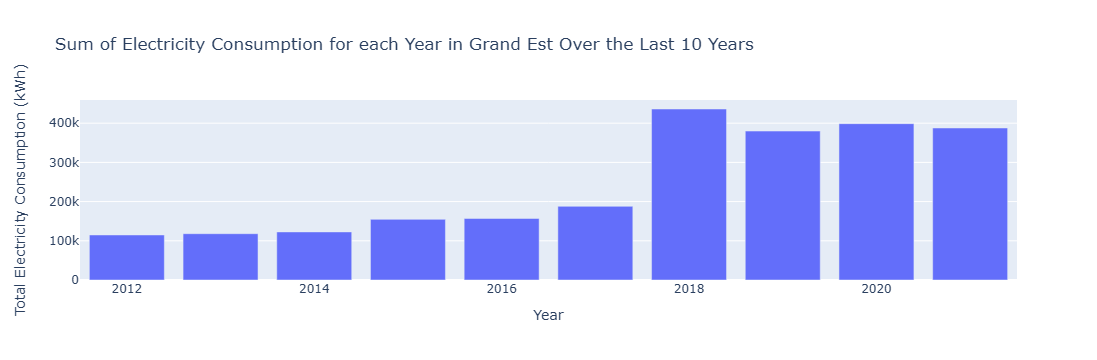

In [119]:
show_region_conso('Grand Est')

Sum of Consumption for each Year in Occitanie
annee
2012    293542.710000
2013    290174.960000
2014    275733.200000
2015    214895.980000
2016    222598.050000
2017    225458.970000
2018    562558.306975
2019    544265.501431
2020    540668.360660
2021    521097.010432
Name: consoa, dtype: float64


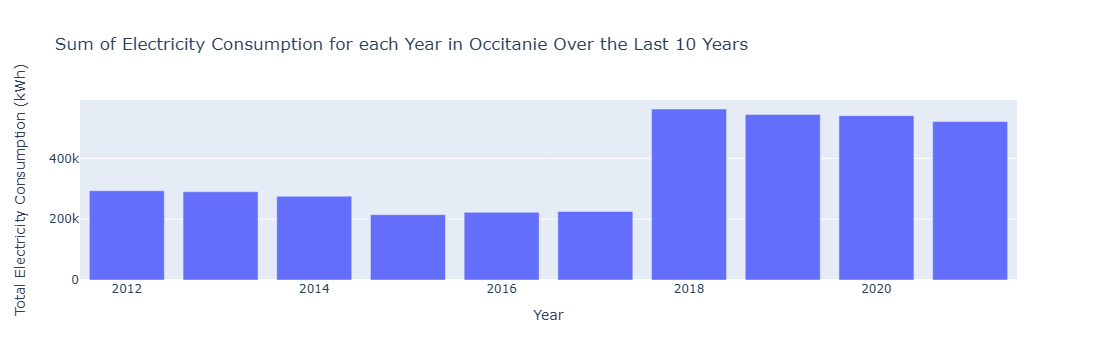

In [120]:
show_region_conso('Occitanie')

Sum of Consumption for each Year in Pays de la Loire
annee
2012    367650.440000
2013    382786.030000
2014    362109.950000
2015    396725.400000
2016    407306.240000
2017    407751.310000
2018    891534.892759
2019    913561.811356
2020    930327.032162
2021    891257.307324
Name: consoa, dtype: float64


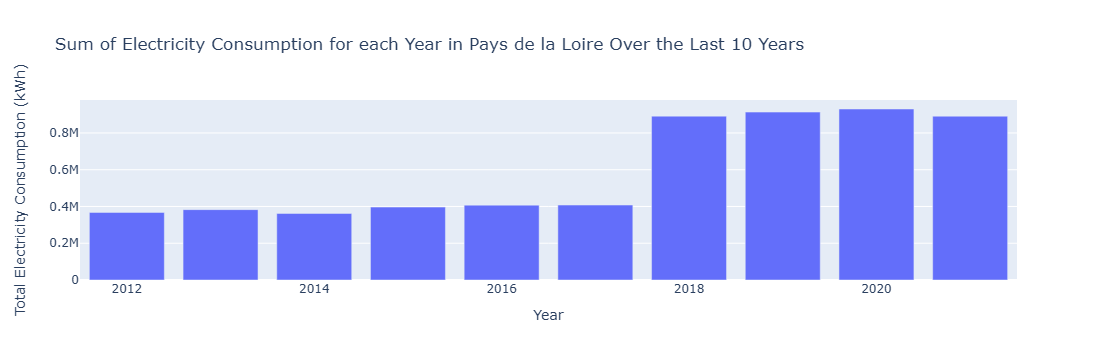

In [121]:
show_region_conso('Pays de la Loire')

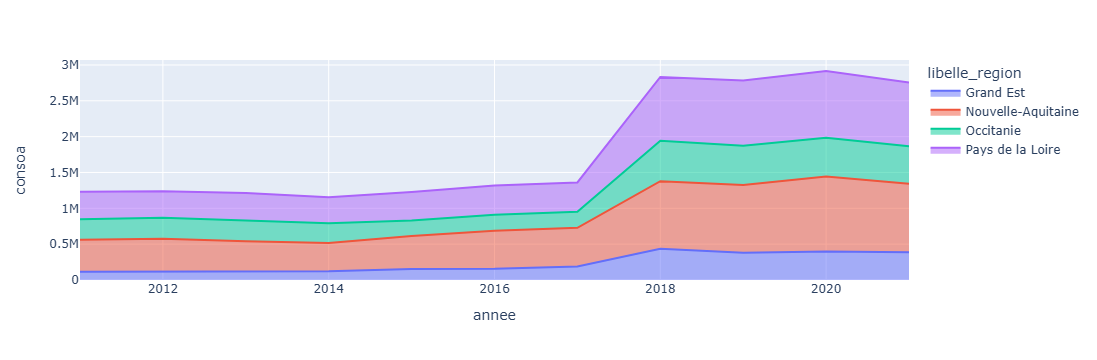

In [122]:
import plotly.express as px

regions = ['Pays de la Loire', 'Occitanie', 'Grand Est', 'Nouvelle-Aquitaine']
filtered_data = C_a_v[(C_a_v['libelle_region'].isin(regions)) & 
                      (C_a_v['filiere'] == 'Electricité')]

sum_by_year_region = filtered_data.groupby(['annee', 'libelle_region'])['consoa'].sum().reset_index()


fig = px.area(sum_by_year_region, x='annee', y='consoa', color='libelle_region', line_group='libelle_region')

fig.show()



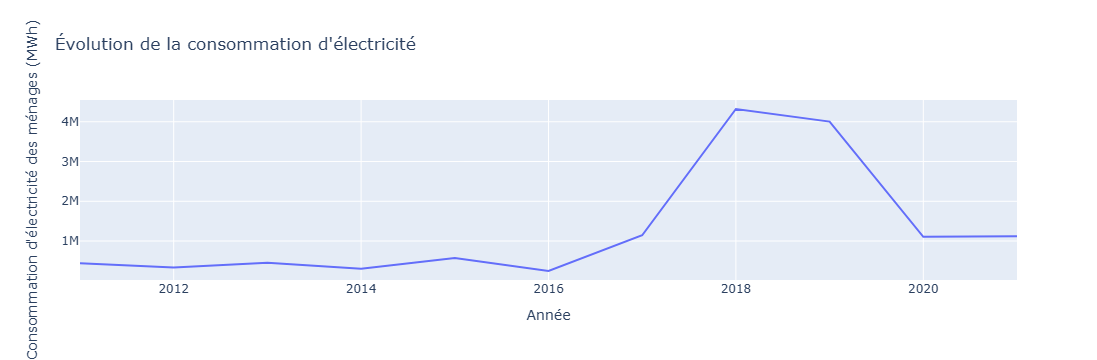

annee      2.217600e+04
consona    1.405189e+07
dtype: float64
    annee       consona
0    2011  4.406206e+05
1    2012  3.325586e+05
2    2013  4.560282e+05
3    2014  3.041326e+05
4    2015  5.733437e+05
5    2016  2.464807e+05
6    2017  1.146238e+06
7    2018  4.321371e+06
8    2019  4.005146e+06
9    2020  1.104883e+06
10   2021  1.121091e+06


In [123]:
import plotly.express as px

data_consommation_menages = C_a_v[C_a_v['filiere'] == 'Electricité'][['annee', 'consona']]

consommation_menages_par_annee = data_consommation_menages.groupby('annee')['consona'].sum().reset_index()

fig = px.line(consommation_menages_par_annee, x='annee', y='consona', title="Évolution de la consommation d'électricité ")
fig.update_xaxes(title="Année")
fig.update_yaxes(title="Consommation d'électricité des ménages (MWh)")
fig.show()
print(consommation_menages_par_annee.sum())
print(consommation_menages_par_annee)

In [124]:
pn.columns

Index(['annee', 'production_totale', 'production_thermique',
       'production_thermique_fioul', 'production_thermique_charbon',
       'production_thermique_gaz', 'production_hydraulique',
       'production_nucleaire', 'production_eolienne', 'production_solaire',
       'production_bioenergies', 'consommation_totale'],
      dtype='object')

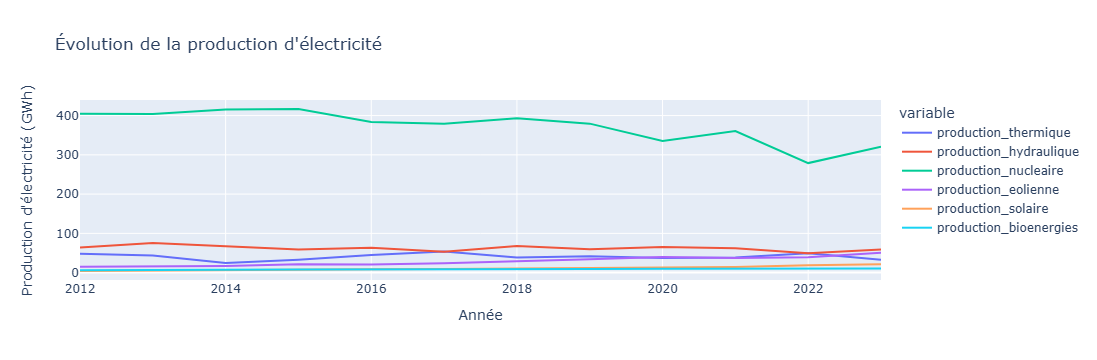

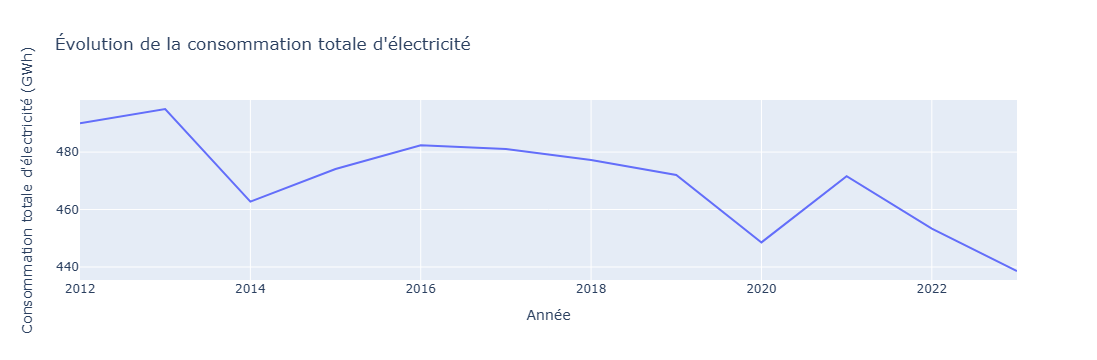

    annee  consommation_totale
6    2012           490.000000
3    2013           495.000000
7    2014           462.739757
8    2015           474.086410
0    2016           482.402093
4    2017           481.081733
9    2018           477.244657
1    2019           472.033672
2    2020           448.554017
10   2021           471.587854
11   2022           453.389006
5    2023           438.598858


In [125]:
import pandas as pd
import plotly.express as px

prod_nationale_aggregated = pn.groupby('annee').sum().reset_index()

fig = px.line(prod_nationale_aggregated, x='annee', y=['production_thermique', 'production_hydraulique', 
                                                     'production_nucleaire', 'production_eolienne', 
                                                     'production_solaire', 'production_bioenergies'],
              title="Évolution de la production d'électricité")
fig.update_xaxes(title="Année")
fig.update_yaxes(title="Production d'électricité (GWh)")
fig.show()


consommation_totale = pn[['annee', 'consommation_totale']].sort_values(by='annee')

fig = px.line(consommation_totale, x='annee', y='consommation_totale', 
              title="Évolution de la consommation totale d'électricité")
fig.update_xaxes(title="Année")
fig.update_yaxes(title="Consommation totale d'électricité (GWh)")
fig.show()
print(consommation_totale)

### calculer la consommation de 10 commune de + 50milles habitants aleatoire , avec knn , superficie et repartition donnée 

In [126]:
prix_energie.columns

Index(['DATE_DEBUT', 'DATE_FIN', 'P_SOUSCRITE', 'PART_FIXE_HT',
       'PART_FIXE_TTC', 'PART_VARIABLE_HT', 'PART_VARIABLE_TTC'],
      dtype='object')

   DATE_DEBUT    DATE_FIN  P_SOUSCRITE PART_FIXE_HT PART_FIXE_TTC  \
0  2012-07-23  31/07/2013            3        55,56         69,37   
1  2012-07-23  31/07/2013            6        65,64         82,98   
2  2012-07-23  31/07/2013            9        76,08         96,97   
3  2012-07-23  31/07/2013           12       118,08         153,7   
4  2012-07-23  31/07/2013           15       135,72        177,66   
..        ...         ...          ...          ...           ...   
88 2023-01-08  31/01/2024           12       183,36        228,99   
85 2023-01-08  31/01/2024            3        94,08        114,14   
86 2023-01-08  31/01/2024            6       121,92        149,96   
87 2023-01-08  31/01/2024            9       152,28        189,01   
89 2023-01-08  31/01/2024           15       211,92        265,73   

   PART_VARIABLE_HT PART_VARIABLE_TTC  
0            0,0822            0,1256  
1            0,0828            0,1263  
2            0,0848            0,1287  
3          

C:\Users\PROPRIETAIRE\AppData\Local\Temp\ipykernel_14116\1799189426.py:5: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



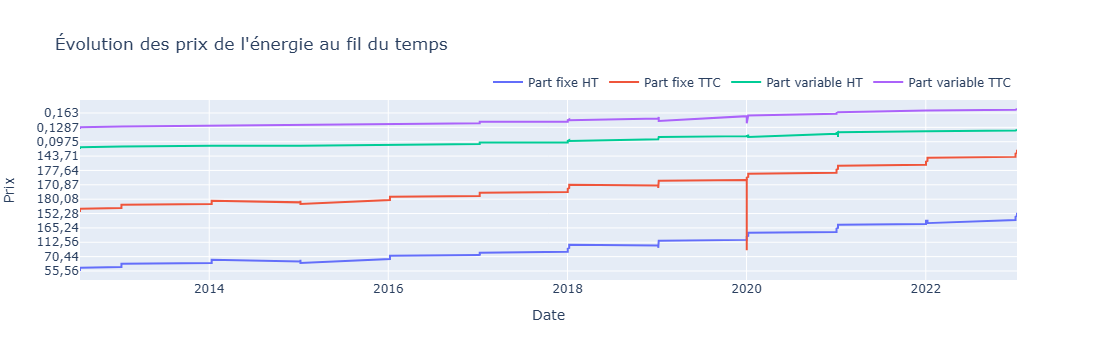

In [127]:
import pandas as pd
import plotly.graph_objects as go


prix_energie['DATE_DEBUT'] = pd.to_datetime(prix_energie['DATE_DEBUT'])


prix_energie_sorted = prix_energie.sort_values(by='DATE_DEBUT')
print(prix_energie_sorted)
fig = go.Figure()

fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_FIXE_HT'], mode='lines', name='Part fixe HT'))
fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_FIXE_TTC'], mode='lines', name='Part fixe TTC'))
fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_VARIABLE_HT'], mode='lines', name='Part variable HT'))
fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_VARIABLE_TTC'], mode='lines', name='Part variable TTC'))


fig.update_layout(title='Évolution des prix de l\'énergie au fil du temps',
                   xaxis_title='Date',
                   yaxis_title='Prix',
                   legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                   )

# Afficher le graphique
fig.show()



In [128]:
prix_energie_all = pd.read_csv("Option_HPHC.csv",sep=';')

In [129]:
prix_energie_all.columns

Index(['DATE_DEBUT', 'DATE_FIN', 'P_SOUSCRITE', 'PART_FIXE_HT',
       'PART_FIXE_TTC', 'PART_VARIABLE_HC_HT', 'PART_VARIABLE_HC_TTC',
       'PART_VARIABLE_HP_HT', 'PART_VARIABLE_HP_TTC'],
      dtype='object')

    DATE_DEBUT    DATE_FIN  P_SOUSCRITE PART_FIXE_HT PART_FIXE_TTC  \
0   2012-07-23  31/07/2013          6.0         79,2         99,54   
1   2012-07-23  31/07/2013          9.0        94,44        119,73   
2   2012-07-23  31/07/2013         12.0       156,72        203,92   
3   2012-07-23  31/07/2013         15.0       183,72        240,11   
4   2012-07-23  31/07/2013         18.0       208,68        274,14   
..         ...         ...          ...          ...           ...   
145 2024-01-02         NaN          9.0       161,40        200,33   
144 2024-01-02         NaN          6.0       128,40        157,87   
146 2024-01-02         NaN         12.0       193,44        241,54   
151 2024-01-02         NaN         36.0       430,68        546,71   
152        NaT         NaN          NaN          NaN           NaN   

    PART_VARIABLE_HC_HT PART_VARIABLE_HC_TTC PART_VARIABLE_HP_HT  \
0                0,0578               0,0964              0,0935   
1                0,0578

C:\Users\PROPRIETAIRE\AppData\Local\Temp\ipykernel_14116\2041398949.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



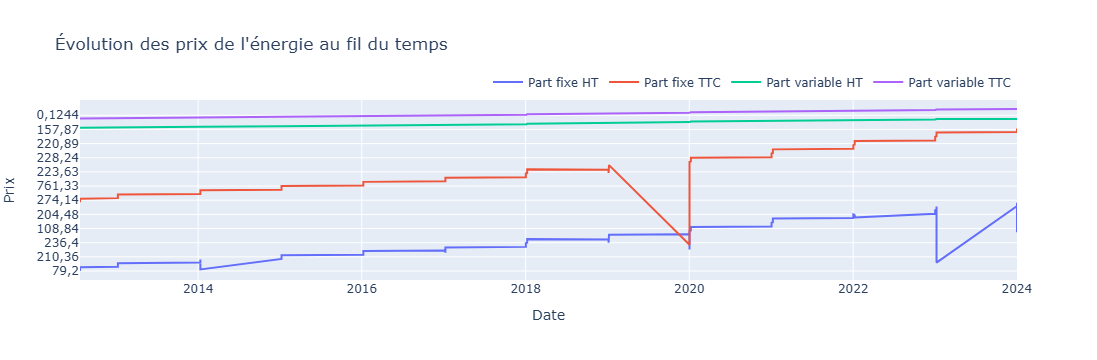

In [130]:
prix_energie_all['DATE_DEBUT'] = pd.to_datetime(prix_energie_all['DATE_DEBUT'])


prix_energie_sorted = prix_energie_all.sort_values(by='DATE_DEBUT')
print(prix_energie_sorted)
fig = go.Figure()

fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_FIXE_HT'], mode='lines', name='Part fixe HT'))
fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_FIXE_TTC'], mode='lines', name='Part fixe TTC'))
fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_VARIABLE_HC_HT'], mode='lines', name='Part variable HT'))
fig.add_trace(go.Scatter(x=prix_energie_sorted['DATE_DEBUT'], y=prix_energie_sorted['PART_VARIABLE_HC_TTC'], mode='lines', name='Part variable TTC'))


fig.update_layout(title='Évolution des prix de l\'énergie au fil du temps',
                   xaxis_title='Date',
                   yaxis_title='Prix',
                   legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                   )

# Afficher le graphique
fig.show()

In [131]:
prix_energie['PART_FIXE_HT'] = prix_energie['PART_FIXE_HT'].str.replace(',', '.').astype(float)

In [132]:
prix_energie['PART_FIXE_TTC'] = prix_energie['PART_FIXE_TTC'].str.replace(',', '.').astype(float)

In [133]:
prix_energie['PART_VARIABLE_HT'] = prix_energie['PART_VARIABLE_HT'].str.replace(',', '.').astype(float)

In [134]:
prix_energie['PART_VARIABLE_TTC'] = prix_energie['PART_VARIABLE_TTC'].str.replace(',', '.').astype(float)

In [135]:
import pandas as pd
variable_fixe_ht = []
part_fixe_ht = [] 
anneelist = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

def prix_energie1(type):
    prix_energie['DATE_DEBUT'] = pd.to_datetime(prix_energie['DATE_DEBUT'])
    prix_energie['YEAR'] = prix_energie['DATE_DEBUT'].dt.year
    
    moyennes = [] 
    
    for annee in anneelist:
        part_fixe_annee = prix_energie.loc[prix_energie['YEAR'] == annee, type]
        moyenne_de_lannee = part_fixe_annee.mean()
        moyennes.append(moyenne_de_lannee) 
    if type == 'PART_FIXE_HT' :
        part_fixe_ht.append(moyennes)
    print(moyennes)
    if type == 'PART_VARIABLE_HT':
        variable_fixe_ht.append(moyennes)
        
type = ['PART_FIXE_HT','PART_FIXE_TTC','PART_VARIABLE_HT','PART_VARIABLE_TTC']
for item in type:
    print(f'--------------- {item}-----------------')
    prix_energie1(item)
    print('--------------------------------')


--------------- PART_FIXE_HT-----------------
[90.21600000000001, 96.84, 99.696, 99.696, 102.28799999999998, 92.064, 99.86399999999999, 108.17999999999999, 117.3, 129.3, 137.23200000000003]
--------------------------------
--------------- PART_FIXE_TTC-----------------
[116.136, 123.054, 126.58399999999999, 126.58399999999999, 129.32, 118.856, 126.102, 136.469, 148.68, 162.084, 170.739]
--------------------------------
--------------- PART_VARIABLE_HT-----------------
[0.08387999999999998, 0.0883, 0.0909, 0.0909, 0.0932, 0.09228, 0.09104000000000001, 0.09666000000000001, 0.09899, 0.10076999999999998, 0.1374]
--------------------------------
--------------- PART_VARIABLE_TTC-----------------
[0.12760000000000002, 0.1329, 0.1401, 0.1437, 0.1503, 0.14922, 0.14772000000000002, 0.15461, 0.15758, 0.15985000000000002, 0.174]
--------------------------------


In [136]:
print(part_fixe_ht)

[[90.21600000000001, 96.84, 99.696, 99.696, 102.28799999999998, 92.064, 99.86399999999999, 108.17999999999999, 117.3, 129.3, 137.23200000000003]]


### evolution du prix de l'electricité en augmentation depuis 2012
##### source data.gouv


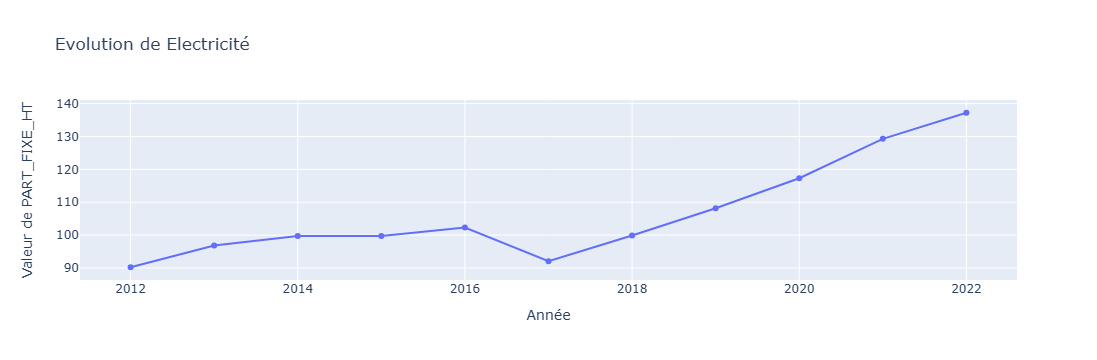

In [137]:
import pandas as pd
import plotly.graph_objects as go

anneelist = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

trace = go.Scatter(x=anneelist, y=part_fixe_ht[0], mode='lines+markers', name='PART_FIXE_HT')

layout = go.Layout(title='Evolution de Electricité',
                   xaxis=dict(title='Année'),
                   yaxis=dict(title='Valeur de PART_FIXE_HT'))

fig = go.Figure(data=[trace], layout=layout)

fig.show()

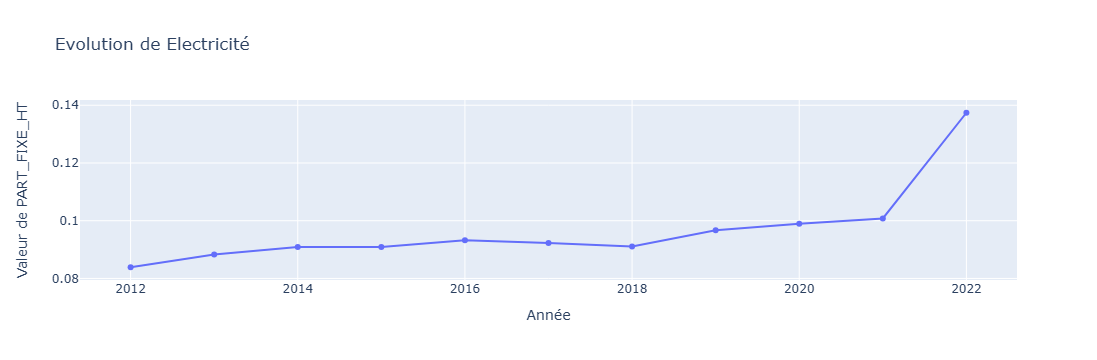

In [138]:
import pandas as pd
import plotly.graph_objects as go

anneelist = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

trace = go.Scatter(x=anneelist, y=variable_fixe_ht[0], mode='lines+markers', name='PART_FIXE_HT')

layout = go.Layout(title='Evolution de Electricité',
                   xaxis=dict(title='Année'),
                   yaxis=dict(title='Valeur de PART_FIXE_HT'))

fig = go.Figure(data=[trace], layout=layout)

fig.show()

### Ecolution prix du gaz de 2013 à 2022
###### source open data fichier : TRV_gaz_naturel_residentiel_BASE_2013-2022

In [139]:
###### chargmement données pour le gaz 
contrat_gaz = pd.read_excel('TRV_gaz_naturel_residentiel_BASE_2013-2022.xlsx')

In [140]:
contrat_gaz.columns

Index(['DATE_DEBUT', 'DATE_FIN', 'PART_FIXE_HT (€/an)', 'PART_FIXE_TTC (€/an)',
       'PART_VARIABLE_HT (€/MWh)', 'PART_VARIABLE_TTC (€/MWh)'],
      dtype='object')

In [141]:
import pandas as pd
variable_fixe_ht_gaz = []
part_fixe_ht_gaz = [] 
anneelist = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

def prix_gaz(type):
    contrat_gaz['DATE_DEBUT'] = pd.to_datetime(contrat_gaz['DATE_DEBUT'])
    contrat_gaz['YEAR'] = contrat_gaz['DATE_DEBUT'].dt.year
    
    moyennes = [] 
    
    for annee in anneelist:
        part_fixe_annee = contrat_gaz.loc[contrat_gaz['YEAR'] == annee, type]
        moyenne_de_lannee = part_fixe_annee.mean()
        moyennes.append(moyenne_de_lannee) 
    if type == 'PART_FIXE_HT (€/an)' :
        part_fixe_ht_gaz.append(moyennes)
    print(moyennes)
    if type == 'PART_VARIABLE_HT (€/MWh)':
        variable_fixe_ht_gaz.append(moyennes)
        
type = ['PART_FIXE_HT (€/an)','PART_FIXE_TTC (€/an)','PART_VARIABLE_HT (€/MWh)','PART_VARIABLE_TTC (€/MWh)']
for item in type:
    print(f'--------------- {item}-----------------')
    prix_gaz(item)
    print('--------------------------------')


--------------- PART_FIXE_HT (€/an)-----------------
[56.57999999999999, 62.52, 71.34000000000002, 79.37999999999998, 81.05999999999999, 87.17999999999999, 93.54, 89.58, 86.64, 86.7]
--------------------------------
--------------- PART_FIXE_TTC (€/an)-----------------
[66.72833333333334, 74.165, 83.83, 92.39, 94.08, 102.105, 108.995, 104.89999999999999, 101.98157499999998, 102.120816168883]
--------------------------------
--------------- PART_VARIABLE_HT (€/MWh)-----------------
[72.14166666666667, 69.44166666666668, 63.43333333333334, 54.66666666666668, 55.13333333333335, 58.97499999999999, 59.50000000000001, 52.225, 67.725, 85.0]
--------------------------------
--------------- PART_VARIABLE_TTC (€/MWh)-----------------
[86.575, 84.47500000000001, 79.27500000000002, 70.8, 73.20833333333333, 80.90833333333333, 81.55, 72.82499999999999, 91.38600000000001, 112.09200000000003]
--------------------------------


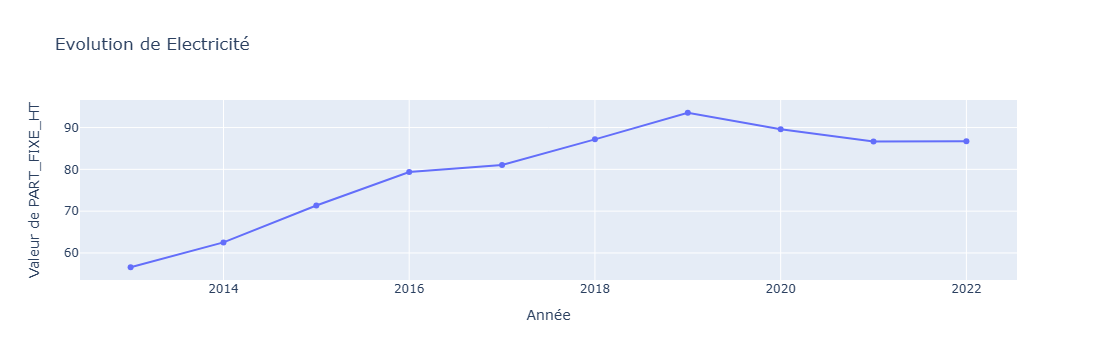

In [142]:
import pandas as pd
import plotly.graph_objects as go

anneelist = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

trace = go.Scatter(x=anneelist, y=part_fixe_ht_gaz[0], mode='lines+markers', name='PART_FIXE_HT')

layout = go.Layout(title='Evolution de Electricité',
                   xaxis=dict(title='Année'),
                   yaxis=dict(title='Valeur de PART_FIXE_HT'))

fig = go.Figure(data=[trace], layout=layout)

fig.show()

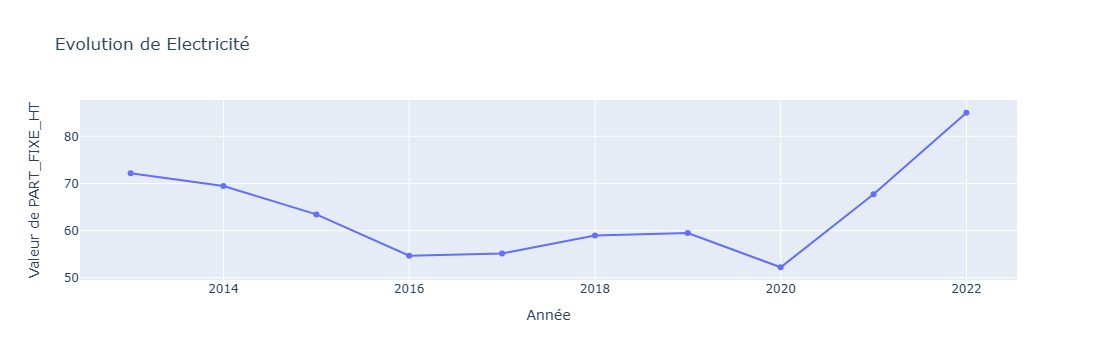

In [143]:
import pandas as pd
import plotly.graph_objects as go

anneelist = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

trace = go.Scatter(x=anneelist, y=variable_fixe_ht_gaz[0], mode='lines+markers', name='PART_FIXE_HT')

layout = go.Layout(title='Evolution de Electricité',
                   xaxis=dict(title='Année'),
                   yaxis=dict(title='Valeur de PART_FIXE_HT'))

fig = go.Figure(data=[trace], layout=layout)

fig.show()